# Project Name: Credit Score Classification Case Study
# Project Description: 
### Banks and credit card companies calculate your credit score to determine your credit worthiness.
### It helps banks and credit card companies immediately to issue loans to customers with good creditworthiness.
### Today banks and credit card companies use Machine Learning algorithms to classify all the customers in their database based on their credit history.
### Credit Score Classification:
### There are three credit scores that banks and credit card companies use to label their customers:

### 1.Good
### 2.Standard
### 3.Poor
### A person with a good credit score will get loans from any bank and financial institution. 
### For the task of Credit Score Classification, we need a labelled dataset with credit scores.

### To Solve this case study we will perform these steps:
### 1. Data Loading
### 2. Data Cleaning
### 3. Data Exploration (EDA)
### 4. Feature Transformation --> Changing Categorical data to Numerical
### 5. Splitting the Data to train and test the Model
### 6. Building the Model
### 7. Understanding the Model Parameter
### 8. Model Prediction
### 9. Measuring the Accuracy

In [163]:
# Load all the packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle as pkl
from sklearn import preprocessing 
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



In [370]:
## Load the data into the dataframe
df_info = pd.read_csv(r'C:\Users\kgupta\Desktop\train.csv',low_memory=False)

In [371]:
## Check the data
df_info.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [373]:
## Check the dtypes of the columns
df_info.dtypes

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

# Drop the Columns which are not required

In [206]:
## Copy the data set and then drop the columns
df_copy = df_info.copy()
cols = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
        'Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
df_info.drop(columns = cols, inplace = True)

# Drop the Null Value columns

In [207]:
## Drop the null values from column 
df_info.dropna(subset = 'Num_of_Delayed_Payment',inplace = True)

In [208]:
## Check if there is any null value or not
df_info['Num_of_Delayed_Payment'] = df_info['Num_of_Delayed_Payment'].str.replace('-','')
df_info['Num_of_Delayed_Payment'] = df_info['Num_of_Delayed_Payment'].str.replace('_','')

# Filter and Transform the Columns

In [209]:
df_info =  df_info[df_info['Payment_Behaviour'] != '!@9#%8']

In [210]:
df_info['Monthly_Balance'] = df_info['Monthly_Balance'].replace(np.nan,0)

In [211]:
df_info['Monthly_Balance'].isnull().sum()

0

In [212]:
df_info.dropna(subset = ['Credit_History_Age'], inplace = True)

In [213]:
df_info.isnull().sum()

Age                       0
Occupation                0
Annual_Income             0
Delay_from_due_date       0
Num_of_Delayed_Payment    0
Outstanding_Debt          0
Credit_History_Age        0
Payment_of_Min_Amount     0
Total_EMI_per_month       0
Payment_Behaviour         0
Monthly_Balance           0
Credit_Score              0
dtype: int64

In [214]:
df_info['Age'] = df_info['Age'].str.replace('-','')
df_info['Age'] = df_info['Age'].str.replace('_','')

In [215]:
df_info['Age'] = df_info['Age'].astype('int')

In [216]:
df_info = df_info[df_info['Age'] <= 150]

In [217]:
df_info = df_info[df_info['Occupation'] != '_______']

In [218]:
df_info['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [219]:
df_info['Annual_Income'] = df_info['Annual_Income'].str.replace('_','')

In [220]:
df_info['Delay_from_due_date'] = df_info['Delay_from_due_date'].astype('str').str.replace('-','')

In [221]:
df_info['Delay_from_due_date'] = df_info['Delay_from_due_date'].astype('int')

In [222]:
df_info['Num_of_Delayed_Payment'] = df_info['Num_of_Delayed_Payment'].astype('int')

In [223]:
df_info['Outstanding_Debt'] = df_info['Outstanding_Debt'].str.replace('_','')

In [224]:
df_info['Outstanding_Debt'] = df_info['Outstanding_Debt'].astype('float')

In [225]:
df_info['Credit_History_Age'] = df_info['Credit_History_Age'].str.replace('Years and','')
df_info['Credit_History_Age'] = df_info['Credit_History_Age'].str.replace('Months','')
df_info['Credit_History_Age'] = df_info['Credit_History_Age'].str.replace('  ','.')
df_info['Credit_History_Age'] = df_info['Credit_History_Age'].str.strip()

In [226]:
df_info['Credit_History_Age'] = df_info['Credit_History_Age'].astype('float')
save_data = df_info.copy()

In [227]:
df_info['Payment_of_Min_Amount'] = df_info['Payment_of_Min_Amount'].str.replace('NM','0')
df_info['Payment_of_Min_Amount'] = df_info['Payment_of_Min_Amount'].str.replace('No','1')
df_info['Payment_of_Min_Amount'] = df_info['Payment_of_Min_Amount'].str.replace('Yes','2')

In [228]:
df_info['Payment_of_Min_Amount'] = df_info['Payment_of_Min_Amount'].astype('int')

In [229]:
df_info['Total_EMI_per_month'] = df_info['Total_EMI_per_month'].astype('float')

In [230]:
df_info['Annual_Income'] = df_info['Annual_Income'].astype('float')

In [231]:
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('High_spent_Large_value_payments','6')
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('Low_spent_Large_value_payments','5')
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('High_spent_Medium_value_payments','4')
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('Low_spent_Medium_value_payments','3')
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('High_spent_Small_value_payments','2')
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].str.replace('Low_spent_Small_value_payments','1')

In [232]:
df_info['Monthly_Balance'] = df_info['Monthly_Balance'].str.replace('-','')

In [233]:
df_info = df_info[df_info['Monthly_Balance'] != '__333333333333333333333333333__'] 
df_info['Monthly_Balance'] = df_info['Monthly_Balance'].fillna(0)

In [234]:
df_info['Monthly_Balance'] = df_info['Monthly_Balance'].astype('float')
save_data['Credit_Sc'] = df_info['Credit_Score']

In [235]:
df_info['Credit_Score'] = df_info['Credit_Score'].str.replace('Poor','1')
df_info['Credit_Score'] = df_info['Credit_Score'].str.replace('Standard','2')
df_info['Credit_Score'] = df_info['Credit_Score'].str.replace('Good','3')

In [236]:
df_info['Credit_Score'] = df_info['Credit_Score'].astype('int')

In [237]:
df_info['Payment_Behaviour'] = df_info['Payment_Behaviour'].astype('int')

# Calculating the Inter Quartile Range to determine outliers and remove the data which exceeds the threshold.

In [238]:
Q1 = df_info['Annual_Income'].quantile(0.25)
Q3 = df_info['Annual_Income'].quantile(0.75)
iqr = Q3 - Q1
Below_threshold = Q3 + (1.5 * iqr)
Above_threshold = Q1 - (1.5 * iqr)
df_info = df_info[df_info['Annual_Income'] < Below_threshold]
df_info = df_info[df_info['Annual_Income'] > Above_threshold]

# Calculating Inter Quartile to determine outliers and remove the data which exceeds or below threshold
Q1_debt = df_info['Outstanding_Debt'].quantile(0.25)
Q3_debt = df_info['Outstanding_Debt'].quantile(0.75)

iqr_dept_threshold = Q3_debt - Q1_debt
Below_threshold_debt = Q3_debt + (1.5 * iqr_dept_threshold)
Above_threshold_debt = Q1_debt - (1.5 * iqr_dept_threshold)
df_info = df_info[df_info['Outstanding_Debt'] < Below_threshold_debt]
df_info = df_info[df_info['Outstanding_Debt'] > Above_threshold_debt]

# Calculating Inter Quartile to determine outliers and remove the data which exceeds or below threshold
Q1_Age = df_info['Age'].quantile(0.25)
Q3_Age = df_info['Age'].quantile(0.75)

iqr_Age_threshold = Q3_Age - Q1_Age
Below_threshold_Age = Q3_Age + (1.5 * iqr_Age_threshold)
Above_threshold_Age = Q1_Age - (1.5 * iqr_Age_threshold)
df_info = df_info[df_info['Age'] < Below_threshold_Age]
df_info = df_info[df_info['Age'] > Above_threshold_Age]

# Calculating Inter Quartile to determine outliers and remove the data which exceeds or below threshold

# Transform the Categorical Variable to Numerical 

In [239]:
transformed_data = pd.get_dummies(df_info,drop_first = False, prefix= 'Occupation',columns = ['Occupation'] ,dtype = int)

In [240]:
transformed_data.head(10)
transformed_data.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
count,65156.000000,65156.000000,65156.000000,65156.000000,65156.00000,65156.000000,65156.000000,65156.000000,65156.000000,65156.000000,...,65156.000000,65156.000000,65156.000000,65156.00000,65156.000000,65156.000000,65156.000000,65156.000000,65156.000000,65156.000000
mean,33.500261,49324.441658,20.376619,30.907652,1270.32912,18.851026,1.393978,1393.349709,3.186138,395.869757,...,0.067392,0.065765,0.070830,0.06420,0.067914,0.066548,0.064230,0.067592,0.067239,0.063478
std,10.824980,35607.647012,14.313077,227.485096,929.11481,8.054786,0.692047,8251.308053,1.779937,204.405106,...,0.250702,0.247873,0.256543,0.24511,0.251600,0.249239,0.245165,0.251046,0.250437,0.243823
min,14.000000,7005.930000,0.000000,0.000000,0.23000,0.100000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,19557.100000,10.000000,9.000000,546.83000,12.900000,1.000000,28.845211,1.000000,270.797454,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,36901.310000,17.000000,13.000000,1117.63000,18.600000,2.000000,66.560642,3.000000,337.870318,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,71230.840000,27.000000,18.000000,1732.95500,25.300000,2.000000,153.665319,5.000000,469.498708,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,56.000000,153147.640000,67.000000,4397.000000,4064.81000,33.800000,2.000000,82331.000000,6.000000,1432.042077,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Exploration - EDA

[]

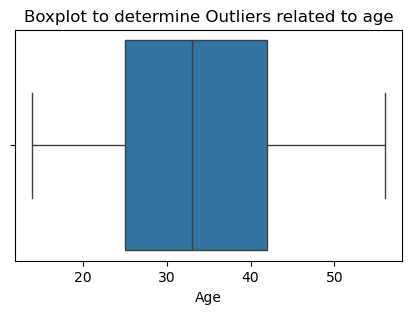

In [241]:
plt.figure(figsize = (5,3))
ax = sns.boxplot(transformed_data, x='Age')
ax.set_title('Boxplot to determine Outliers related to age')
plt.plot()

[]

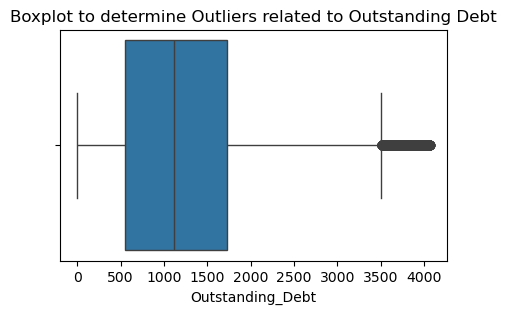

In [242]:
plt.figure(figsize = (5,3))
ax = sns.boxplot(transformed_data, x='Outstanding_Debt')
ax.set_title('Boxplot to determine Outliers related to Outstanding Debt')
plt.plot()

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

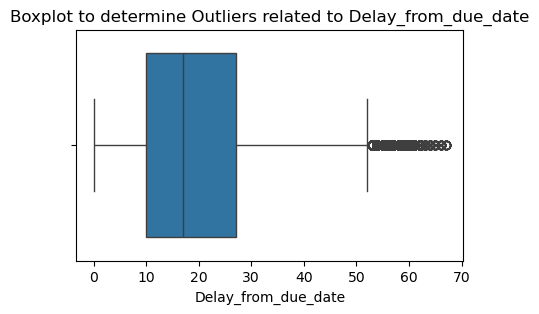

In [243]:
plt.figure(figsize = (5,3))
ax = sns.boxplot(transformed_data, x='Delay_from_due_date')
ax.set_title('Boxplot to determine Outliers related to Delay_from_due_date')
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

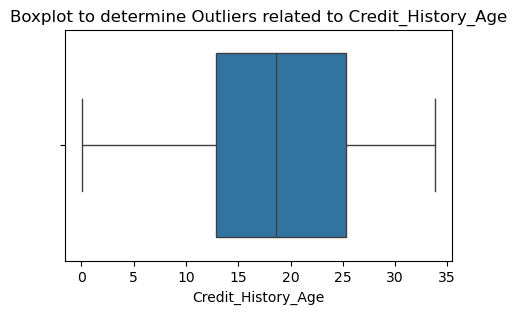

In [244]:
plt.figure(figsize = (5,3))
ax = sns.boxplot(transformed_data, x='Credit_History_Age')
ax.set_title('Boxplot to determine Outliers related to Credit_History_Age')
plt.plot

## No outliers in Credit_History_Age

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

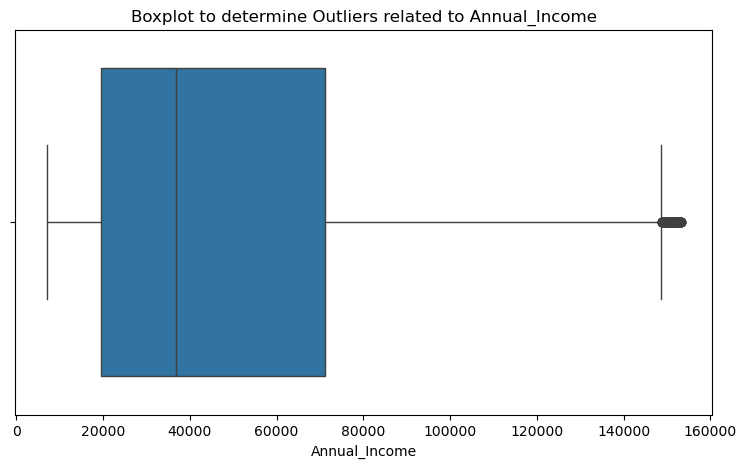

In [283]:
plt.figure(figsize = (9,5))
ax = sns.boxplot(transformed_data, x='Annual_Income')
ax.set_title('Boxplot to determine Outliers related to Annual_Income')
plt.plot

In [246]:
save_data['Annual_Income'] = save_data['Annual_Income'].astype('float')

In [247]:
df_info.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,65156.000000,65156.000000,65156.000000,65156.000000,65156.00000,65156.000000,65156.000000,65156.000000,65156.000000,65156.000000,65156.000000
mean,33.500261,49324.441658,20.376619,30.907652,1270.32912,18.851026,1.393978,1393.349709,3.186138,395.869757,1.897584
std,10.824980,35607.647012,14.313077,227.485096,929.11481,8.054786,0.692047,8251.308053,1.779937,204.405106,0.674492
min,14.000000,7005.930000,0.000000,0.000000,0.23000,0.100000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,25.000000,19557.100000,10.000000,9.000000,546.83000,12.900000,1.000000,28.845211,1.000000,270.797454,1.000000
50%,33.000000,36901.310000,17.000000,13.000000,1117.63000,18.600000,2.000000,66.560642,3.000000,337.870318,2.000000
75%,42.000000,71230.840000,27.000000,18.000000,1732.95500,25.300000,2.000000,153.665319,5.000000,469.498708,2.000000
max,56.000000,153147.640000,67.000000,4397.000000,4064.81000,33.800000,2.000000,82331.000000,6.000000,1432.042077,3.000000


[]

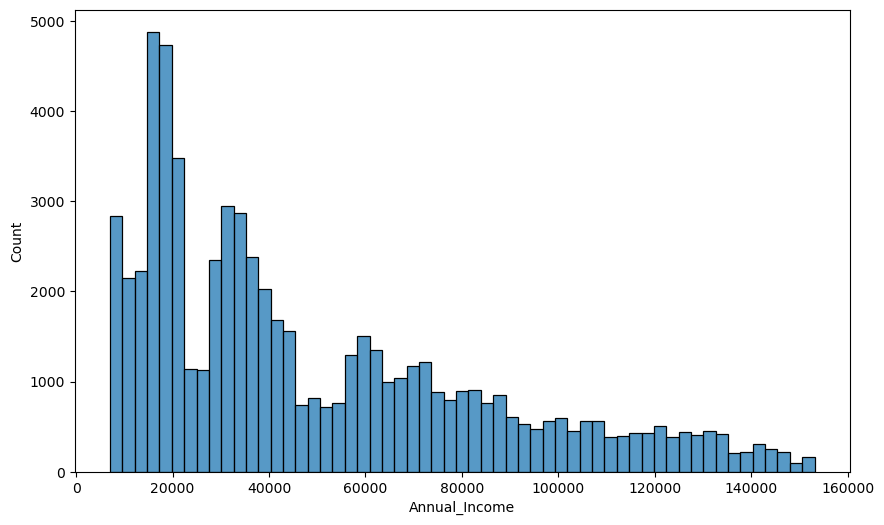

In [248]:
plt.figure(figsize = (10,6))
ax = sns.histplot(df_info, x='Annual_Income')
plt.plot()

C:\Users\kgupta\AppData\Local\Temp\ipykernel_13460\2249000962.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=35,horizontalalignment='right')


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

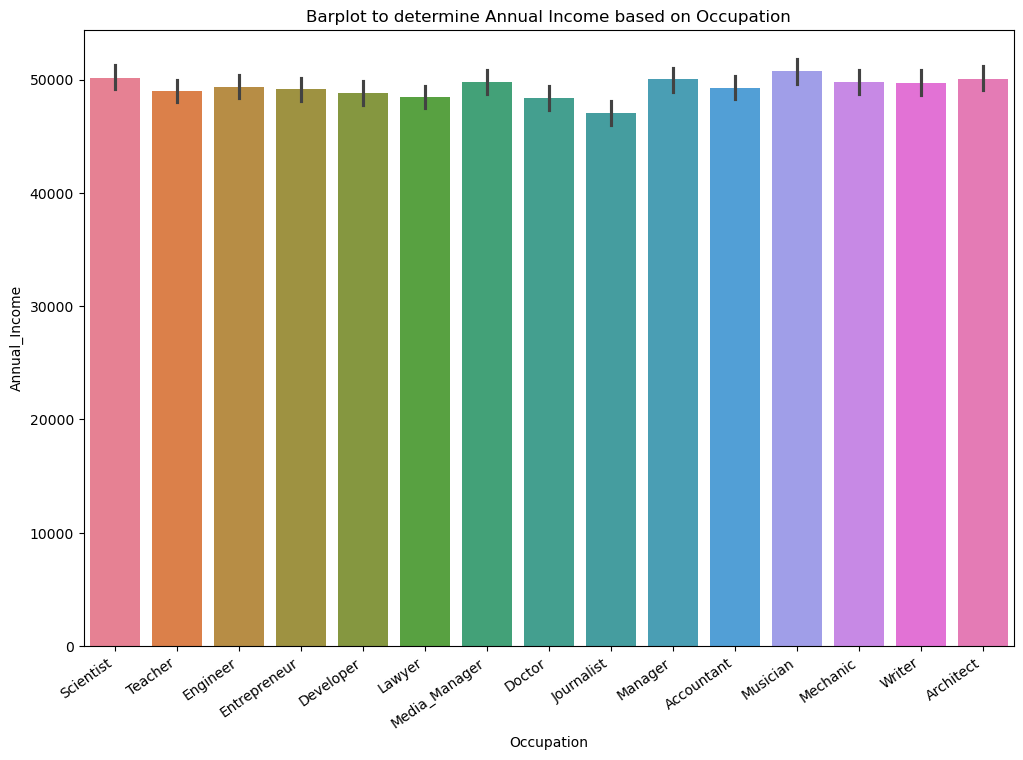

In [249]:
plt.figure(figsize = (12,8))
ax = sns.barplot(df_info, y='Annual_Income',x ='Occupation',hue='Occupation')
ax.set_title('Barplot to determine Annual Income based on Occupation')
ax.set_xticklabels(ax.get_xticklabels(),rotation=35,horizontalalignment='right')
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

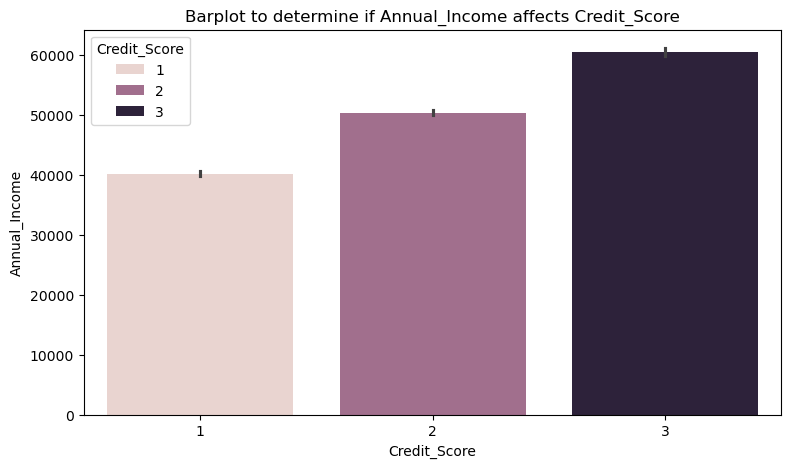

In [284]:
plt.figure(figsize = (9,5))
ax = sns.barplot(df_info, y='Annual_Income',x ='Credit_Score',hue='Credit_Score')
ax.set_title('Barplot to determine if Annual_Income affects Credit_Score')
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

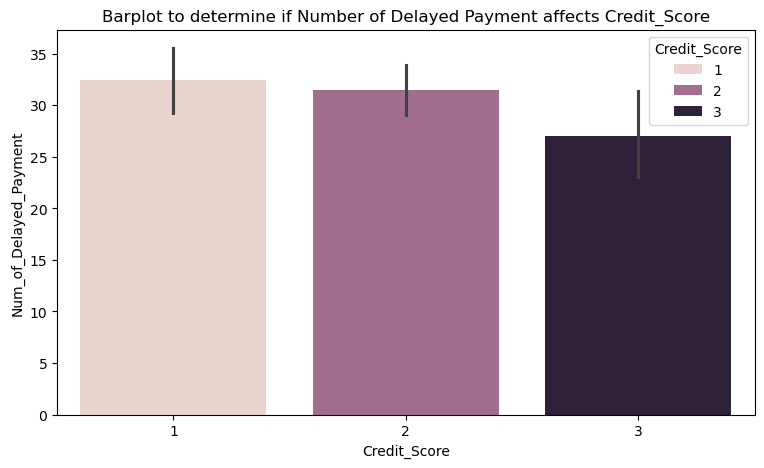

In [285]:
plt.figure(figsize = (9,5))
ax = sns.barplot(df_info, y='Num_of_Delayed_Payment',x ='Credit_Score',hue='Credit_Score')
ax.set_title('Barplot to determine if Number of Delayed Payment affects Credit_Score')
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

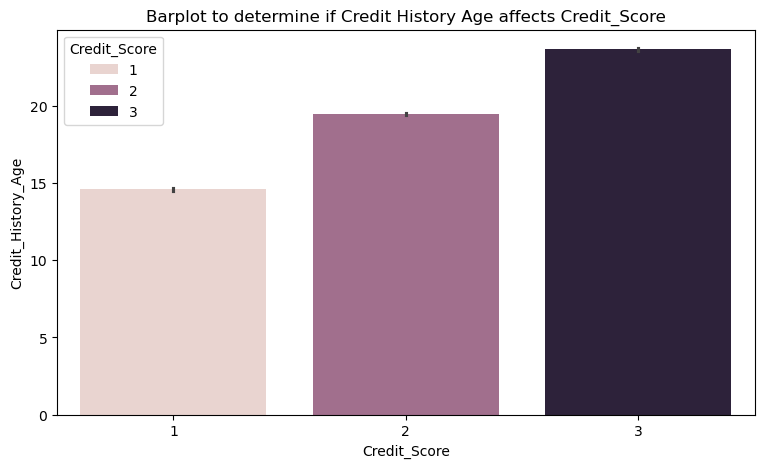

In [286]:
plt.figure(figsize = (9,5))
ax = sns.barplot(df_info, y='Credit_History_Age',x ='Credit_Score',hue='Credit_Score')
ax.set_title('Barplot to determine if Credit History Age affects Credit_Score')
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

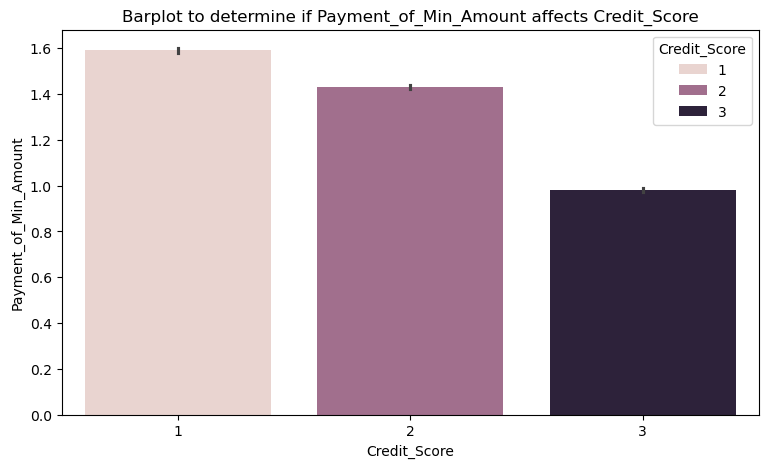

In [287]:
plt.figure(figsize = (9,5))
ax = sns.barplot(df_info, y='Payment_of_Min_Amount',x ='Credit_Score',hue='Credit_Score')
ax.set_title('Barplot to determine if Payment_of_Min_Amount affects Credit_Score')
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

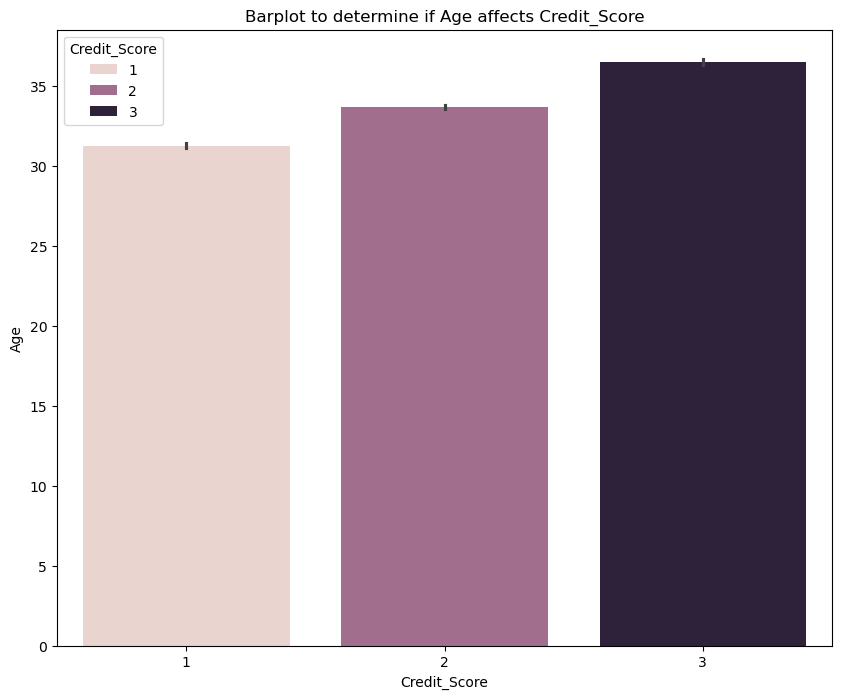

In [300]:
plt.figure(figsize = (10,8))
ax = sns.barplot(df_info, y='Age',x ='Credit_Score',hue='Credit_Score')
ax.set_title('Barplot to determine if Age affects Credit_Score')
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

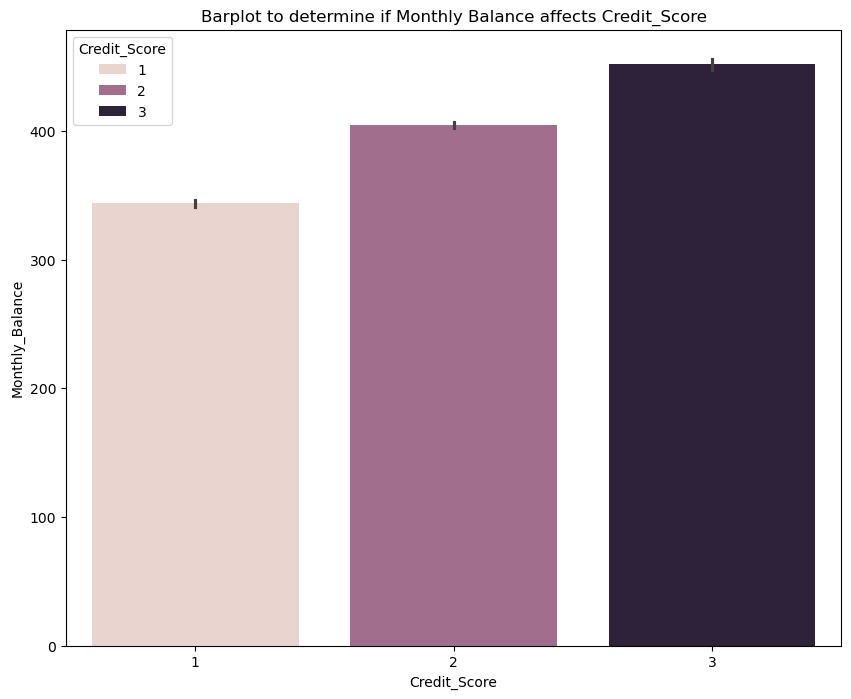

In [315]:
plt.figure(figsize = (10,8))
ax = sns.barplot(df_info, y='Monthly_Balance',x ='Credit_Score',hue='Credit_Score')
ax.set_title('Barplot to determine if Monthly Balance affects Credit_Score')
plt.plot

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.088125,-0.165348,0.001063,-0.197432,0.226855,-0.161259,0.001878,0.031518,0.112008,0.160807
Annual_Income,0.088125,1.000000,-0.214886,0.003529,-0.257129,0.242443,-0.162440,0.007836,0.301806,0.641525,0.192667
Delay_from_due_date,-0.165348,-0.214886,1.000000,0.009978,0.546723,-0.452347,0.305953,-0.007090,-0.075559,-0.242526,-0.433979
Num_of_Delayed_Payment,0.001063,0.003529,0.009978,1.000000,0.006931,-0.007286,0.010117,-0.002145,0.006922,0.000047,-0.007377
Outstanding_Debt,-0.197432,-0.257129,0.546723,0.006931,1.000000,-0.591837,0.304489,-0.009655,-0.095709,-0.292476,-0.412039
Credit_History_Age,0.226855,0.242443,-0.452347,-0.007286,-0.591837,1.000000,-0.360389,0.007553,0.088417,0.294158,0.382356
Payment_of_Min_Amount,-0.161259,-0.162440,0.305953,0.010117,0.304489,-0.360389,1.000000,-0.006628,-0.051436,-0.180965,-0.280537
Total_EMI_per_month,0.001878,0.007836,-0.007090,-0.002145,-0.009655,0.007553,-0.006628,1.000000,0.001283,0.001679,0.004972
Payment_Behaviour,0.031518,0.301806,-0.075559,0.006922,-0.095709,0.088417,-0.051436,0.001283,1.000000,0.475868,0.104895
Monthly_Balance,0.112008,0.641525,-0.242526,0.000047,-0.292476,0.294158,-0.180965,0.001679,0.475868,1.000000,0.180970


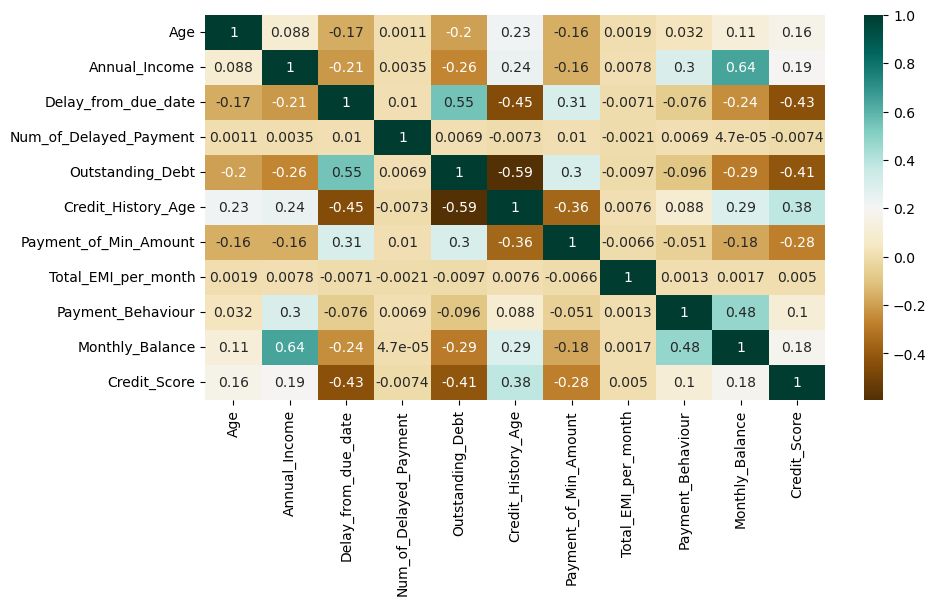

In [290]:
df_info_heatmap = df_info.copy()
df_info_heatmap.drop(columns ='Occupation',axis=1,inplace = True)
plt.figure(figsize=(10,5))
c=df_info_heatmap.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

# feature the columns and then split the data into train and test

In [408]:
X = transformed_data.copy()
X.drop(columns =['Credit_Score'],inplace = True)
y = np.array(transformed_data[['Credit_Score']])

X.isnull().sum()


Age                         0
Annual_Income               0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Outstanding_Debt            0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Payment_Behaviour           0
Monthly_Balance             0
Occupation_Accountant       0
Occupation_Architect        0
Occupation_Developer        0
Occupation_Doctor           0
Occupation_Engineer         0
Occupation_Entrepreneur     0
Occupation_Journalist       0
Occupation_Lawyer           0
Occupation_Manager          0
Occupation_Mechanic         0
Occupation_Media_Manager    0
Occupation_Musician         0
Occupation_Scientist        0
Occupation_Teacher          0
Occupation_Writer           0
dtype: int64

# Normalize the Data using Standard Scaler

In [409]:
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)
X


array([[-0.97001027, -0.84842881, -1.21404731, ...,  3.71412602,
        -0.26848754, -0.26034795],
       [-0.97001027, -0.84842881, -1.07431388, ...,  3.71412602,
        -0.26848754, -0.26034795],
       [-0.97001027, -0.84842881, -1.21404731, ...,  3.71412602,
        -0.26848754, -0.26034795],
       ...,
       [-0.785251  , -0.27228775,  0.183287  , ..., -0.26924235,
        -0.26848754, -0.26034795],
       [-0.785251  , -0.27228775, -0.16604658, ..., -0.26924235,
        -0.26848754, -0.26034795],
       [-0.785251  , -0.27228775,  0.46275386, ..., -0.26924235,
        -0.26848754, -0.26034795]])

In [410]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.25,random_state = 42)


# Instantiate model.

In [411]:
rfc = RandomForestClassifier(random_state = 42)

# Fit the Data into Model

In [412]:
rfc.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=42)

# Predict the test data 

In [413]:
y_predict = rfc.predict(X_test)

# Evaluating the Model

In [414]:
print('The Precision Score is: {ps:.2f}' .format(ps = metrics.precision_score(y_test,y_predict,average = "weighted")))
print('The Recall Score is: {rc:.2f}' .format(rc = metrics.recall_score(y_test,y_predict,average = "weighted")))
print('The Accuracy Score is: {ac:.2f}' .format(ac = metrics.recall_score(y_test,y_predict,average = "weighted")))
print('The F1 Score is: {f1:.2f}' .format(f1 = metrics.f1_score(y_test,y_predict,average = "weighted")))

The Precision Score is: 0.77
The Recall Score is: 0.77
The Accuracy Score is: 0.77
The F1 Score is: 0.77


# Confusion Matrix

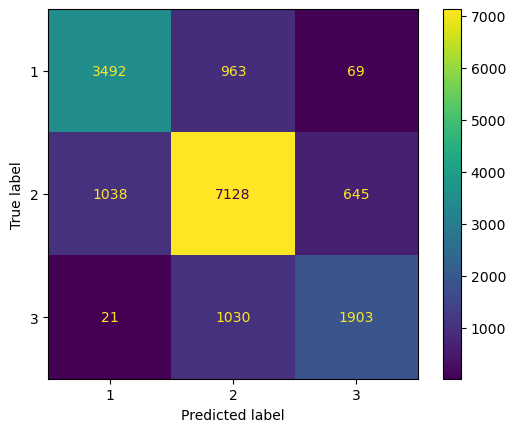

In [362]:
cm = metrics.confusion_matrix(y_test,y_predict,)
dsp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rfc.classes_)
dsp.plot()

# Print the Classification report in case of Multi-Class

In [363]:
print(metrics.classification_report(y_test,y_predict,digits=4))

              precision    recall  f1-score   support

           1     0.7673    0.7719    0.7696      4524
           2     0.7815    0.8090    0.7950      8811
           3     0.7272    0.6442    0.6832      2954

    accuracy                         0.7688     16289
   macro avg     0.7587    0.7417    0.7493     16289
weighted avg     0.7677    0.7688    0.7677     16289



# Approach 2 with Decision Trees Model to see if the Model is perform well on dataset

In [364]:
dtc = DecisionTreeClassifier(random_state = 0)


In [365]:
dtc.fit(X_train,y_train.ravel())

DecisionTreeClassifier(random_state=0)

In [366]:
y_dtc_predict = dtc.predict(X_test)

In [367]:
print(metrics.classification_report(y_test,y_dtc_predict,digits=4))

              precision    recall  f1-score   support

           1     0.6717    0.6802    0.6759      4524
           2     0.7300    0.7265    0.7283      8811
           3     0.5993    0.5965    0.5979      2954

    accuracy                         0.6900     16289
   macro avg     0.6670    0.6677    0.6673     16289
weighted avg     0.6901    0.6900    0.6901     16289



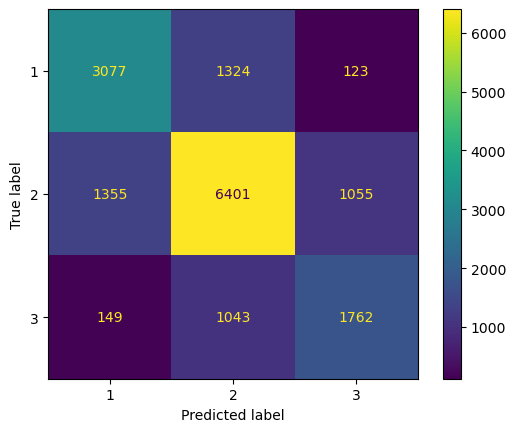

In [368]:
cm = metrics.confusion_matrix(y_test,y_dtc_predict,)
dsp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dtc.classes_)
dsp.plot()

# Based on Model Evaluation, Random Forest works better compared to Decision Tree

<Axes: >

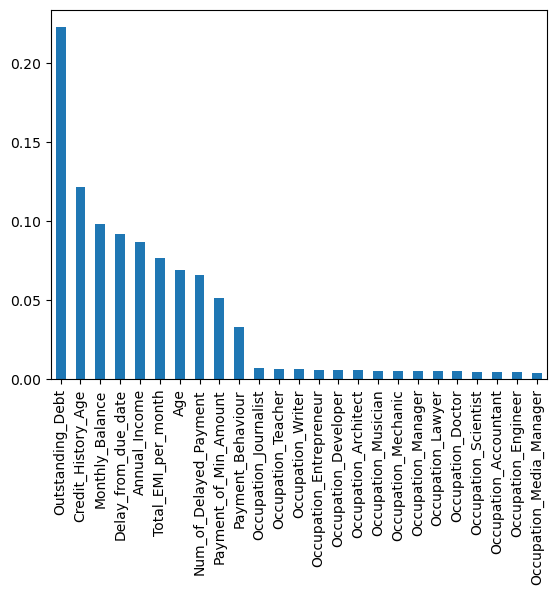

In [384]:
importances = dtc.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

In [381]:
importances

array([0.06927362, 0.08711497, 0.09168659, 0.066212  , 0.22262986,
       0.12164296, 0.05159122, 0.07659326, 0.03309258, 0.09829524,
       0.00471017, 0.00565471, 0.00580589, 0.00492859, 0.00464655,
       0.00606605, 0.0069463 , 0.00510842, 0.00535318, 0.00537991,
       0.00381895, 0.00547789, 0.00490848, 0.00664178, 0.00642086])